In [21]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools

# ***Betweenness Centrality***
--------------------

In [4]:
# This assumes that importance of nodes depends on them connecting other nodes.
# Distance between 2 nodes is the shortest path between them.

karate = nx.karate_club_graph()
karate = nx.convert_node_labels_to_integers(karate, first_label = 1)

In [11]:
list(nx.all_shortest_paths(karate, source = 34, target = 2))

[[34, 14, 2], [34, 20, 2], [34, 31, 2]]

In [12]:
# Note that nodes 14, 20 and 31 are in the shortest paths between nodes 34 and 2.

## ***Betweenness centrality***
# ***$C_{btw}(v) = \sum{_{s,t \in N}{\frac{\sigma_{s,t}{(v)}}{\sigma_{s,t}}}}$***

In [16]:
# Take two different nodes - s and t
# Find all the shortest paths between s and t -> sigma s,t
# Find all the shortest paths between s and t that contain node v -> sigma s,t (v)
# Betweenness centrality is the sum of this for all possible pairs of s and t in the network.

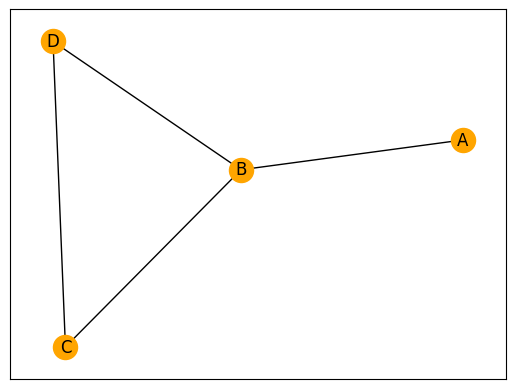

In [15]:
graph = nx.Graph()
graph.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D")])
nx.draw_networkx(graph, node_color = "orange")

# $C_{btw}(B) = \frac{\sigma_{A, C}{(B)}}{\sigma_{A, C}} + \frac{\sigma_{A, D}{(B)}}{\sigma_{A, D}} + \frac{\sigma_{C, D}{(B)}}{\sigma_{C, D}}$

In [19]:
# This equation excludes the node B.

(1 / 1) + (1 / 1) + (0 / 1)

2.0

In [20]:
# If we include node B;

In [47]:
{tuple(sorted(pair)) for pair in itertools.permutations(["A", "B", "C", "D"], r = 2)}

{('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')}

In [52]:
template = r"\frac{\sigma_{%s, %s}{(B)}}{\sigma_{%s, %s}} +"

for (node_1, node_2) in {tuple(sorted(pair)) for pair in itertools.permutations(["A", "B", "C", "D"], r = 2)}:
    print(template % (node_1, node_2, node_1, node_2))

\frac{\sigma_{B, D}{(B)}}{\sigma_{B, D}} +
\frac{\sigma_{A, B}{(B)}}{\sigma_{A, B}} +
\frac{\sigma_{A, D}{(B)}}{\sigma_{A, D}} +
\frac{\sigma_{B, C}{(B)}}{\sigma_{B, C}} +
\frac{\sigma_{A, C}{(B)}}{\sigma_{A, C}} +
\frac{\sigma_{C, D}{(B)}}{\sigma_{C, D}} +


# $C_{btw}(B) = \frac{\sigma_{B, D}{(B)}}{\sigma_{B, D}} +
\frac{\sigma_{A, B}{(B)}}{\sigma_{A, B}} +
\frac{\sigma_{A, D}{(B)}}{\sigma_{A, D}} +
\frac{\sigma_{B, C}{(B)}}{\sigma_{B, C}} +
\frac{\sigma_{A, C}{(B)}}{\sigma_{A, C}} +
\frac{\sigma_{C, D}{(B)}}{\sigma_{C, D}}$

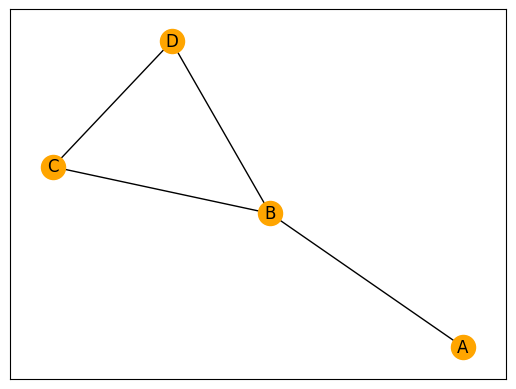

In [58]:
graph = nx.Graph()
graph.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D")])
nx.draw_networkx(graph, node_color = "orange")

In [60]:
(1 / 1) + (1 / 1) + (1 / 1) + (1 / 1) + (1 / 1) + (0 / 1)

5.0